In [104]:
#Exploratory analysis

In [1]:
# colab
! pip install scikit-plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import nan
from numpy import isnan
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import pairwise_distances 
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import SimpleImputer
import scikitplot as skplot
from sklearn.feature_selection import mutual_info_classif


In [107]:
#we set URL as index and we plan to drop timedelta column for future prediction.

In [3]:
df = pd.read_csv("1234.csv",index_col=0)

In [4]:
X=df.drop(df.columns[0],axis=1)

In [ ]:
X.info()

In [111]:
X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

In [112]:
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
X.isnull().sum()

In [ ]:
X.isin([0]).sum()

In [115]:
#It is good that the dataset has no nullvalue, however, there are a lot of zero values in the dataset.
#Some zero values are meaningless for prediction and should be removed.

In [5]:
#ntokenscontent: Number of words in the content
#zero values in n_tokens_content do not make sense.
X = X[X[' n_tokens_content'] != 0]

In [117]:
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [118]:
#We want to label our dataset by shares variable, as a result, we decide to find the median of shares to categorzied data.

In [119]:
X[' shares'].median()

1400.0

In [6]:
temp = []
for i in X[' shares']:
    if i >= 1400:
        temp.append('Popular')
    else:
        temp.append('Unpopular')
Y = pd.concat([X.reset_index(drop=True), pd.DataFrame(temp, columns=['MarketPopularity'])], axis=1)
Y.head(3)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,MarketPopularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,Unpopular
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,Unpopular
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,Popular


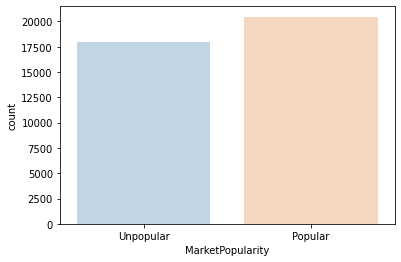

In [7]:
popgraph = sns.countplot(x='MarketPopularity',data=Y,alpha=0.3)

In [122]:
#we notice there are more popular articles in Mashable through the graph.

In [123]:
#Scaling the data

In [8]:
for i in Y.iloc[:,:-1].columns:
    a = Y[Y[i] == 0]
    if a.shape[0] == 0:
        Y[i] = np.log(Y[i])

In [9]:
sc = StandardScaler()
Xscaled = sc.fit_transform(Y.iloc[:, :-2])
Y.iloc[:, :-2] = Xscaled

In [37]:
Y.head(3)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,MarketPopularity,k5_labs
0,0.765258,-0.735213,0.027581,-0.005099,0.031715,-0.636472,-0.360431,-0.42953,-0.303442,-0.026576,-1.155798,-0.238919,2.14712,-0.439847,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.181037,-0.243931,-0.248529,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,1.175690,1.073707,-0.627749,-0.598850,-0.681482,0.731275,-0.316481,0.297032,-0.323346,0.440297,-0.439947,0.163215,0.023072,-0.376285,-0.680907,-0.221774,-0.939753,0.678170,-0.977914,-1.815614,0.144352,-0.238426,Unpopular,1
1,-0.654006,-0.658338,0.011110,-0.005099,0.024639,-0.724652,-0.618848,-0.42953,-0.303442,0.797358,-1.677601,-0.238919,-0.46574,2.273518,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.205804,-0.255851,-0.268730,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,2.303280,-0.415843,-0.591994,-0.568261,-0.647581,-1.309484,0.270321,0.141458,-0.135618,0.201309,-0.200679,-0.910136,-0.924148,-0.376285,1.227528,1.476479,0.113794,-0.867153,-0.268586,0.835448,-0.686644,-0.228241,Unpopular,1
2,-0.654006,-0.752296,0.002821,-0.005099,-0.014030,-0.724652,-0.618848,-0.42953,-0.303442,-1.039899,-0.633996,-0.238919,-0.46574,2.273518,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.159965,-0.233790,-0.231342,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,0.111689,-0.491684,-0.651323,-0.626292,1.522066,2.774679,2.085134,0.987760,-0.721908,1.025575,-1.025911,1.534683,0.023072,1.035440,-1.643721,-0.936828,-0.237388,-0.867153,-0.268586,0.835448,-0.686644,-0.160141,Popular,1


In [ ]:
Y.describe()

In [10]:
pcad = PCA(n_components=3)
pcsd = pcad.fit_transform(Y.iloc[:,:-2])
#pcad.shape

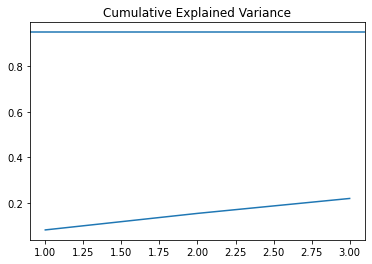

In [11]:
varexpd=pcad.explained_variance_ratio_
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexpd)+1), np.cumsum(varexpd))
plt.axhline(.95)
plt.show()

In [12]:
compsd = pcad.components_

In [13]:
compsd.shape

(3, 58)

In [ ]:
COLSD = ["Stock" + str(i) for i in range(1, len(compsd)+1)]
loadingsd = pd.DataFrame(compsd.T, columns=COLSD, index=Y.iloc[:,:-2].columns)
loadingsd

In [ ]:
sns.heatmap(loadingsd)
plt.show()

In [16]:
def ev_plot(ev):
  y = list(ev)
  x = list(range(1,len(ev)+1))
  return x, y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


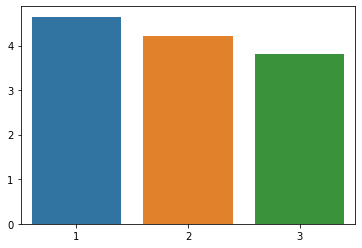

In [17]:
x, y = ev_plot(pcad.explained_variance_)
sns.barplot(x, y)

In [18]:
PCA_components = pd.DataFrame(pcsd)

Text(0, 0.5, 'PCA 2')

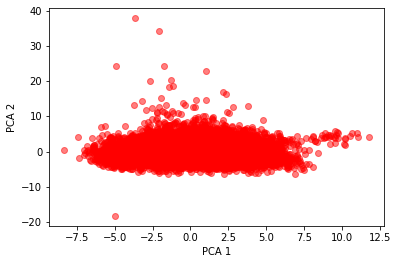

In [19]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 3')

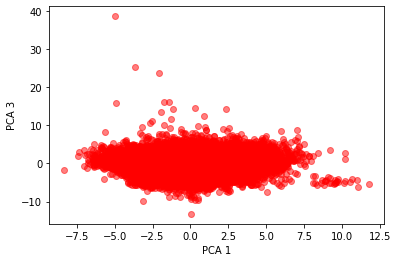

In [20]:
plt.scatter(PCA_components[0], PCA_components[2], alpha=.5, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

Text(0, 0.5, 'PCA 3')

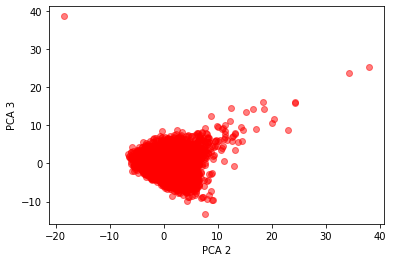

In [21]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.5, color='red')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')

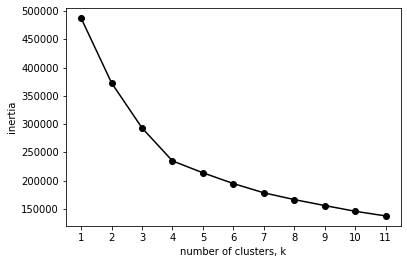

In [22]:
ks = range(1, 12)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


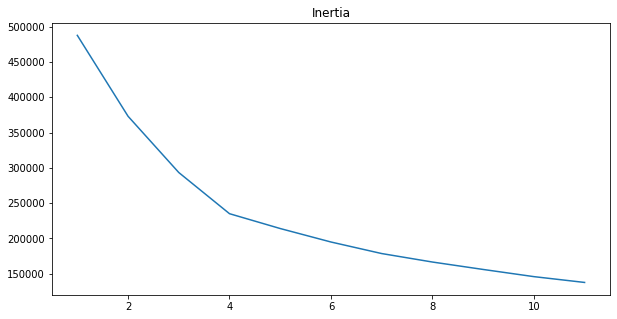

In [23]:
plt.figure(figsize=(10,5))
plt.title("Inertia")
sns.lineplot(ks, inertias)
plt.show()

In [ ]:
#Throught the graph, when K equals to five, it looks good. 

In [24]:
k5=KMeans(5)
k5_labs=k5.fit_predict(pcsd)

In [25]:
Y['k5_labs']=k5_labs

In [26]:
Y.head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,MarketPopularity,k5_labs
0,0.787605,-0.932635,1.067427,-0.005099,1.070406,-0.636472,-0.360431,-0.429530,-0.303442,0.003205,-1.101920,-0.238919,2.14712,-0.439847,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.181037,-0.243931,-0.248529,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,1.175690,1.073707,-0.627749,-0.598850,-0.681482,0.731275,-0.316481,0.297032,-0.323346,0.440297,-0.439947,0.163215,0.023072,-0.376285,-0.680907,-0.221774,-0.939753,0.678170,-0.977914,-1.815614,0.144352,6.385194,Unpopular,1
1,-0.574124,-0.723517,0.598977,-0.005099,0.890393,-0.724652,-0.618848,-0.429530,-0.303442,0.816739,-1.854922,-0.238919,-0.46574,2.273518,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.205804,-0.255851,-0.268730,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,2.303280,-0.415843,-0.591994,-0.568261,-0.647581,-1.309484,0.270321,0.141458,-0.135618,0.201309,-0.200679,-0.910136,-0.924148,-0.376285,1.227528,1.476479,0.113794,-0.867153,-0.268586,0.835448,-0.686644,6.566672,Unpopular,1
2,-0.574124,-0.983768,0.345712,-0.005099,-0.198429,-0.724652,-0.618848,-0.429530,-0.303442,-1.054851,-0.486672,-0.238919,-0.46574,2.273518,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.159965,-0.233790,-0.231342,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,0.111689,-0.491684,-0.651323,-0.626292,1.522066,2.774679,2.085134,0.987760,-0.721908,1.025575,-1.025911,1.534683,0.023072,1.035440,-1.643721,-0.936828,-0.237388,-0.867153,-0.268586,0.835448,-0.686644,7.313220,Popular,3
3,-0.574124,0.284343,-0.322352,-0.005099,-0.182003,-0.195572,-0.877264,-0.429530,-0.303442,-1.011023,0.033512,-0.238919,2.14712,-0.439847,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.205804,-0.255851,-0.268730,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,-0.600882,1.259863,0.983130,-0.641621,-0.721125,-0.307001,-0.231741,0.036339,0.339390,-0.242526,0.243677,0.248978,0.539737,0.094290,-0.843460,-0.221774,-0.588571,-0.867153,-0.268586,0.835448,-0.686644,7.090077,Unpopular,1
4,1.166483,1.249635,-1.292480,-0.005099,-1.462846,0.686228,4.032649,1.860936,-0.303442,0.012028,0.033512,-0.238919,-0.46574,-0.439847,-0.252833,2.061776,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.178590,0.128657,-0.140391,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,-0.600658,-0.512292,-0.668246,-0.642773,2.219574,0.639460,1.644611,2.081766,-0.471794,1.046028,-1.046388,0.543433,-0.924148,1.035440,0.390356,0.135753,0.640567,0.537687,0.247289,-1.574608,-0.082284,6.224558,Unpopular,2


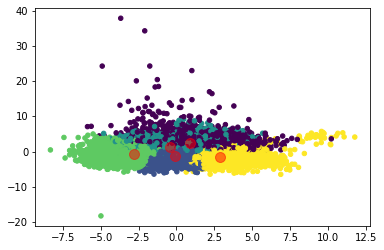

In [27]:
plt.scatter(pcsd[:, 0], pcsd[:, 1], c=k5_labs, s=20, cmap='viridis')
centers = k5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

In [28]:
profile = Y.groupby('k5_labs').mean()
profile

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
k5_labs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.147492,-0.305370,0.402042,-0.005099,0.196538,0.131794,-0.085968,0.196547,0.548320,-0.114118,-0.155154,-0.116814,0.428268,-0.251875,-0.069155,-0.438759,-0.474144,-0.251050,0.199438,0.143015,0.429438,0.279604,0.784801,0.598124,0.609185,1.054831,0.261941,0.359081,0.375376,-0.008596,-0.025702,-0.013124,-0.007320,0.027448,0.013222,0.032981,0.034246,-0.284565,0.262367,-0.524952,1.140584,-0.561530,0.644704,-0.286063,0.002425,0.626300,-0.440757,0.442140,0.496637,0.342785,0.229990,-0.771952,-0.513784,-0.364587,0.384336,-0.033765,-0.145871,0.330394,7.700359
1,-0.055395,-0.376365,0.354437,-0.005099,0.372921,-0.362436,-0.196628,-0.351848,-0.188965,0.057832,-0.120368,-0.032917,-0.141136,0.254546,0.003944,0.121268,0.046764,0.106614,-0.058439,-0.037238,-0.112207,-0.130246,-0.138155,-0.206392,-0.184142,-0.328340,-0.053456,-0.105437,-0.091083,0.034062,0.035495,0.040185,0.011729,0.024567,-0.107637,-0.116451,-0.164396,0.203243,-0.061423,0.086000,-0.345394,0.120513,-0.353402,-0.167084,-0.238013,-0.110795,-0.007629,0.005584,-0.329141,0.029923,-0.450265,0.170612,0.332222,-0.068362,-0.275769,-0.118371,0.179128,-0.293755,7.363313
2,-0.082129,1.065866,-1.055984,-0.005099,-0.883614,0.657453,0.580979,0.628445,-0.013418,-0.244399,0.316975,0.232061,0.078998,-0.059566,0.107085,0.275912,-0.310394,0.000332,-0.011911,0.003445,-0.104443,0.007805,-0.260296,-0.035916,-0.060757,-0.060344,-0.068315,-0.008662,-0.060029,-0.031284,-0.030229,-0.061331,-0.047657,-0.055932,0.190455,0.156531,0.253627,0.048804,0.013373,-0.275694,-0.131239,0.342680,0.188251,0.369427,0.389195,-0.108572,0.290631,-0.290105,0.213093,-0.414648,0.719641,-0.044706,-0.449310,0.336851,0.095539,0.229990,-0.082235,0.154218,7.630557
3,-0.106910,-0.743515,0.621472,0.022469,0.519241,-0.375998,-0.155958,-0.326789,-0.135800,-0.097690,-0.017978,0.040329,-0.147672,0.276826,0.100299,0.297206,-0.432288,0.291587,-0.034085,0.013696,-0.051856,-0.298096,-0.158281,-0.068999,-0.108646,-0.128799,-0.024642,-0.090444,-0.064447,0.001557,0.033088,0.034725,0.039118,-0.024941,-0.086630,-0.049573,-0.099092,0.310681,-0.033053,-0.428653,-0.138688,0.294195,0.134735,1.018721,0.635709,-0.859482,1.117258,-1.118639,0.190867,0.195805,-0.025518,0.718111,1.023134,-0.152727,0.034348,0.247695,-0.140801,0.056150,7.460851
4,0.142068,0.264320,-0.218762,-0.005099,-0.136662,-0.093679,-0.227891,-0.194535,-0.166986,0.472919,-0.061260,-0.177110,-0.212236,-0.305720,-0.181128,-0.380629,1.333549,-0.194569,-0.082591,-0.123251,-0.116366,0.192912,-0.145335,-0.240101,-0.207226,-0.469571,-0.093521,-0.133530,-0.131945,0.001267,-0.017920,0.001093,0.011779,0.036774,-0.020566,-0.025415,-0.033793,-0.378318,-0.181546,1.284155,-0.434716,-0.330628,-0.603507,-1.054550,-0.877510,0.554493,-1.112859,1.115031,-0.570187,-0.081748,-0.542577,-0.122641,-0.429212,0.215107,-0.196316,-0.371642,0.170431,-0.213626,7.162039


In [29]:
Y.k5_labs.value_counts(sort=False)

0    7102
1    9128
2    8605
3    7114
4    6514
Name: k5_labs, dtype: int64

In [183]:
Y.head(3)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,MarketPopularity,k5_labs
0,0.787605,-0.932635,1.067427,-0.005099,1.070406,-0.636472,-0.360431,-0.42953,-0.303442,0.003205,-1.101920,-0.238919,2.14712,-0.439847,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.181037,-0.243931,-0.248529,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,1.175690,1.073707,-0.627749,-0.598850,-0.681482,0.731275,-0.316481,0.297032,-0.323346,0.440297,-0.439947,0.163215,0.023072,-0.376285,-0.680907,-0.221774,-0.939753,0.678170,-0.977914,-1.815614,0.144352,6.385194,Unpopular,0
1,-0.574124,-0.723517,0.598977,-0.005099,0.890393,-0.724652,-0.618848,-0.42953,-0.303442,0.816739,-1.854922,-0.238919,-0.46574,2.273518,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.205804,-0.255851,-0.268730,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,2.303280,-0.415843,-0.591994,-0.568261,-0.647581,-1.309484,0.270321,0.141458,-0.135618,0.201309,-0.200679,-0.910136,-0.924148,-0.376285,1.227528,1.476479,0.113794,-0.867153,-0.268586,0.835448,-0.686644,6.566672,Unpopular,0
2,-0.574124,-0.983768,0.345712,-0.005099,-0.198429,-0.724652,-0.618848,-0.42953,-0.303442,-1.054851,-0.486672,-0.238919,-0.46574,2.273518,-0.252833,-0.485019,-0.519245,-0.38004,-0.297576,-0.502764,-0.231884,-3.467382,-1.936095,-0.977811,-0.919158,-2.38501,-0.159965,-0.233790,-0.231342,2.223489,-0.478711,-0.480105,-0.473822,-0.410122,-0.256192,-0.272407,-0.387702,0.111689,-0.491684,-0.651323,-0.626292,1.522066,2.774679,2.085134,0.987760,-0.721908,1.025575,-1.025911,1.534683,0.023072,1.035440,-1.643721,-0.936828,-0.237388,-0.867153,-0.268586,0.835448,-0.686644,7.313220,Popular,3


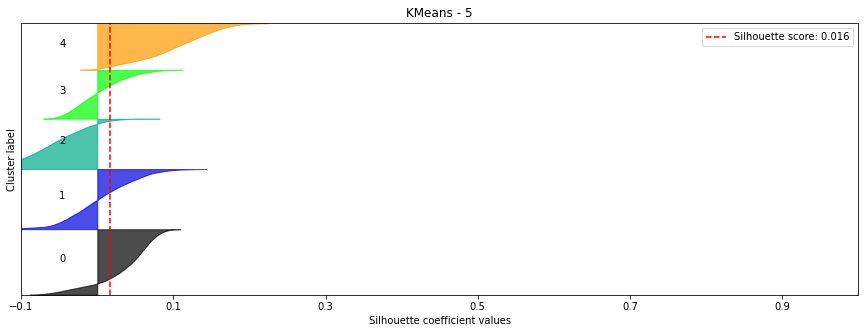

In [186]:
skplot.metrics.plot_silhouette(Y.iloc[:,:-3], k5_labs, title="KMeans - 5", figsize=(15,5))
plt.show()

In [37]:
k5_labs

array([1, 1, 3, ..., 0, 4, 3], dtype=int32)

In [ ]:
#Visulization & Summary
#We want to find the relationship among the vairables of the five clusters.
#We first assign values to the five clusters, and then we research and decide to use mutual information method to present the results.

In [30]:
c1 = Y[Y['k5_labs'] == 0]
c2 = Y[Y['k5_labs'] == 1]
c3 = Y[Y['k5_labs'] == 2]
c4 = Y[Y['k5_labs'] == 3]
c5 = Y[Y['k5_labs'] == 4]

Text(0.5, 1.0, 'Mutual Information of Cluster1')

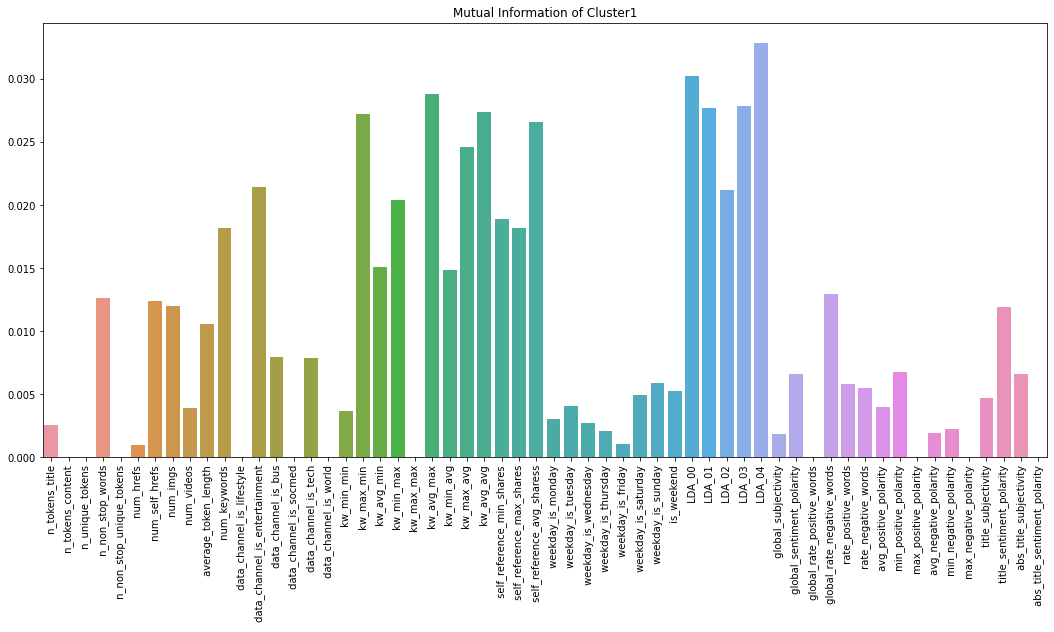

In [33]:
X_axis1 = c1.iloc[:, :-3]
y_axis1 = c1.iloc[:, -2]
map1 = mutual_info_classif(X_axis1, y_axis1, 'auto')
plt.figure(figsize=(18, 8))
g = sns.barplot(x=X_axis1.columns,y=map1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information of Cluster1")

Text(0.5, 1.0, 'Mutual Information of Cluster2')

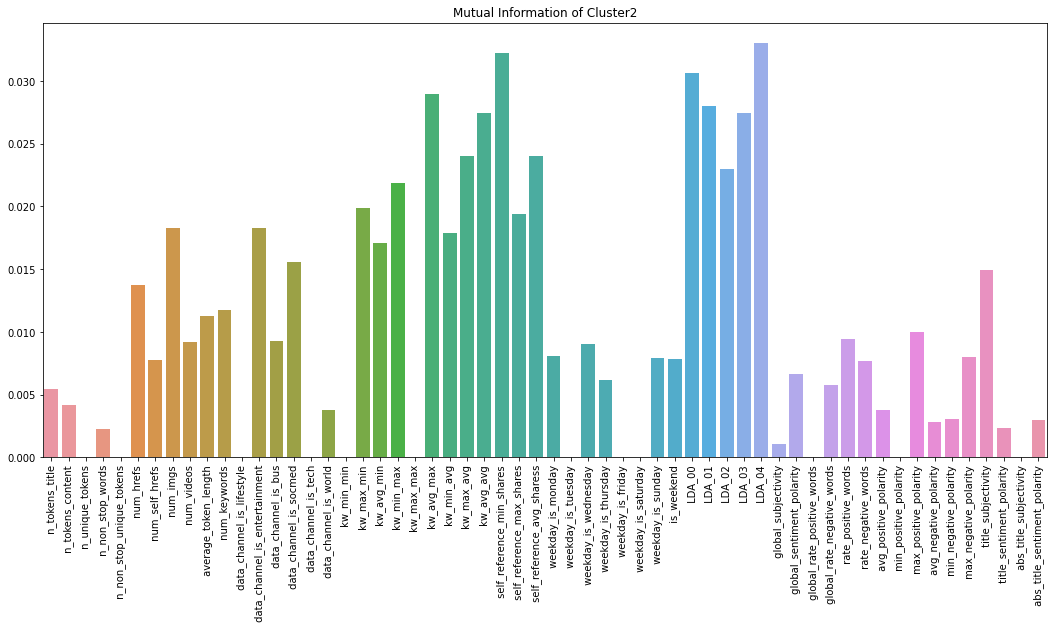

In [32]:
X_axis2 = c1.iloc[:, :-3]
y_axis2 = c1.iloc[:, -2]
map2 = mutual_info_classif(X_axis2, y_axis2, 'auto')
plt.figure(figsize=(18, 8))
g = sns.barplot(x=X_axis2.columns,y=map2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information of Cluster2")

Text(0.5, 1.0, 'Mutual Information of Cluster3')

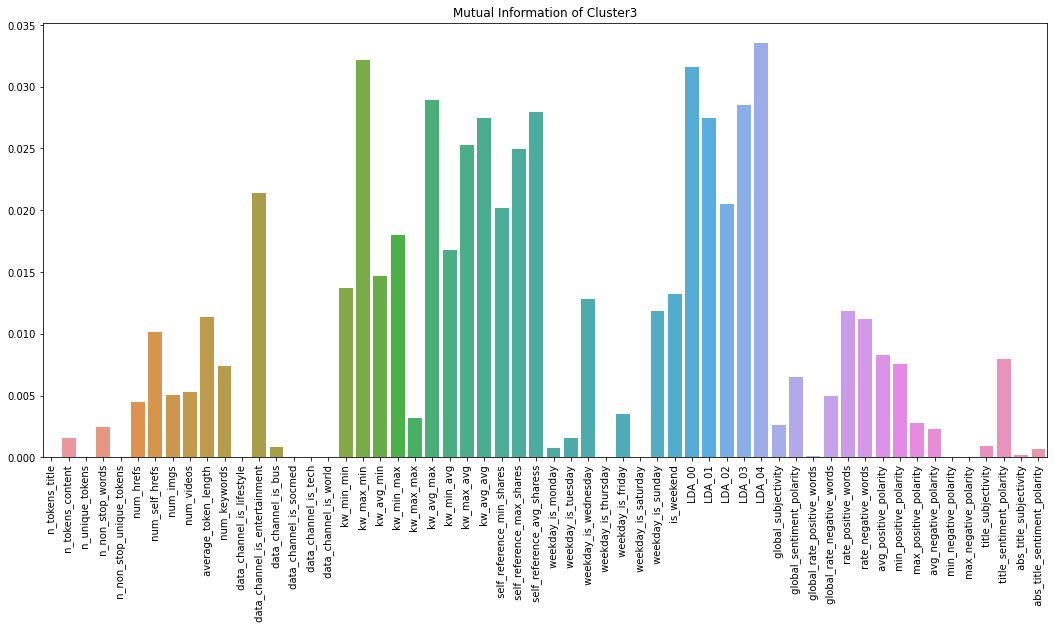

In [34]:
X_axis3 = c1.iloc[:, :-3]
y_axis3 = c1.iloc[:, -2]
map3 = mutual_info_classif(X_axis3, y_axis3, 'auto')
plt.figure(figsize=(18, 8))
g = sns.barplot(x=X_axis3.columns,y=map3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information of Cluster3")

Text(0.5, 1.0, 'Mutual Information of Cluster4')

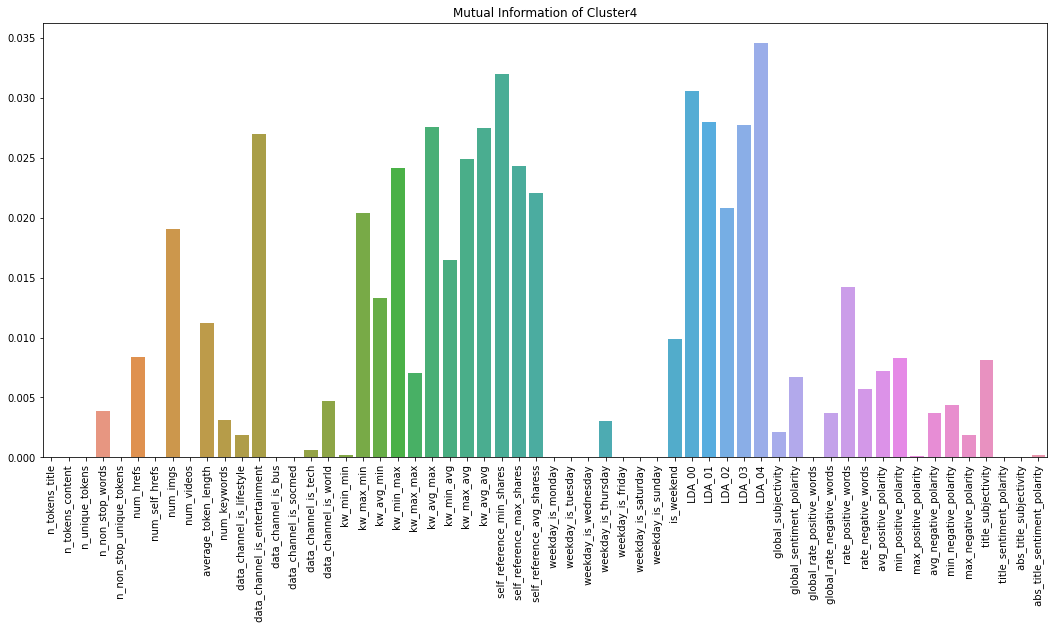

In [35]:
X_axis4 = c1.iloc[:, :-3]
y_axis4 = c1.iloc[:, -2]
map4 = mutual_info_classif(X_axis4, y_axis4, 'auto')
plt.figure(figsize=(18, 8))
g = sns.barplot(x=X_axis4.columns,y=map4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information of Cluster4")

Text(0.5, 1.0, 'Mutual Information of Cluster5')

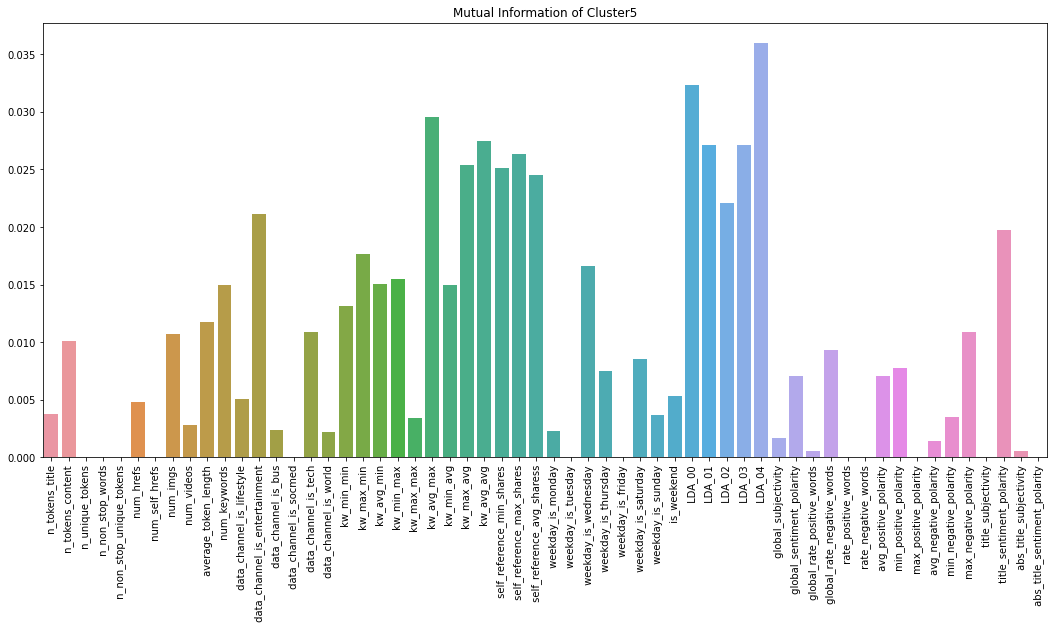

In [36]:
X_axis5 = c1.iloc[:, :-3]
y_axis5 = c1.iloc[:, -2]
map5 = mutual_info_classif(X_axis5, y_axis5, 'auto')
plt.figure(figsize=(18, 8))
g = sns.barplot(x=X_axis5.columns,y=map5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information of Cluster5")

In [ ]:
#Hclust

In [ ]:
# type(Y)

In [8]:
# diste = pdist(Y.iloc[:,:-3].values)

In [10]:
# distc = pdist(Y.iloc[:,:-3].values, metric='cosine')

In [ ]:
# distm = pdist(Y.iloc[:,:-3].values, metric='cityblock')

In [ ]:
# distj = pdist(Y.iloc[:,:-3].values, metric='jaccard')

In [9]:
# hclust_e = linkage(diste)
# hclust_c = linkage(distc)
# hclust_m = linkage(distm)
# hclust_j = linkage(distj)

In [ ]:
# LINKS = [hclust_e, hclust_c, hclust_m, hclust_j]
# TITLE = ['Euclidean', 'Cosine','Manhattan','Jaccard']

# plt.figure(figsize=(15,5))

# #loop and build our plot
# for i, m in enumerate(LINKS):
#   plt.subplot(1,4,i+1)
#   plt.title(TITLE[i])
#   dendrogram(m,
#              #labels = ps.index
#              leaf_rotation=90,
#              # leaf_font_size=10,
#              orientation='left')
# plt.show()